In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import os

In [2]:
directory = 'subpopulation_analysis/'

In [10]:
all_files = os.listdir(directory)

all_subpops = ['Tcells']
all_metrics = ['num_nodes','num_edges']

dic = {}

In [11]:
subpop_files = []

for filename in all_files:
    
    if any(subpop in filename for subpop in all_subpops): 
        subpop_files.append(directory + filename)

In [12]:
subpop_files

['subpopulation_analysis/subpop_FA2_CD28_Tcells.csv',
 'subpopulation_analysis/subpop_FA1_CD28_Tcells.csv',
 'subpopulation_analysis/subpop_FA3_CD28_Tcells.csv']

In [13]:
pn_files = [f for f in subpop_files if 'FA3' in f]
young_files = [f for f in subpop_files if 'FA1' in f]
old_files = [f for f in subpop_files if 'FA2' in f]

In [14]:
def createDF(file_list):
    df = pd.read_csv(file_list[0])
    for i in range(1, len(file_list)):
        df = df.append(pd.read_csv(file_list[i]))
    return df

In [15]:
pn = createDF(pn_files)
young = createDF(young_files)
old = createDF(old_files)

In [16]:
print(len(pn))
print(len(young))
print(len(old))

164
156
35


In [32]:
pn['subpopulation'].unique()

array(['FA3_CD28_Tcells'], dtype=object)

In [34]:
for metric in all_metrics:

    pn_df = pd.DataFrame({'group' : np.repeat('pn',len(pn)), metric : pn[metric]})
    young_df = pd.DataFrame({'group' : np.repeat('young',len(young)), metric : young[metric]})
    old_df = pd.DataFrame({'group' : np.repeat('old',len(old)), metric : old[metric]})

    all_df = pn_df.append(young_df).append(old_df)

    sns_fig = sns.boxplot(x='group',y=metric,data=all_df, palette="Blues")
    ax = sns.stripplot(x='group', y=metric, data=all_df, color="purple", jitter=0.2, size=2.5)
    plt.title("T Cells " + metric)

    for patch in ax.artists:
     r, g, b, a = patch.get_facecolor()
     patch.set_facecolor((r, g, b, .5))

    fig = sns_fig.get_figure()
    fig.savefig("subpopulation_graphs/Tcells_" + metric + ".png",dpi=600)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [35]:
pn['entropy_per_node'] = pn['giulia_spatial_entropy'] / pn['num_nodes']
young['entropy_per_node'] = young['giulia_spatial_entropy'] / young['num_nodes']
old['entropy_per_node'] = old['giulia_spatial_entropy'] / old['num_nodes']


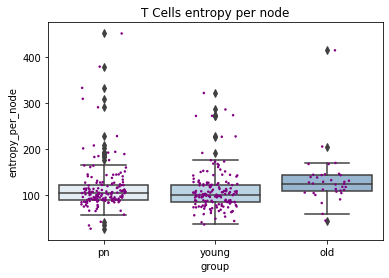

In [36]:
pn_df = pd.DataFrame({'group' : np.repeat('pn',len(pn)), 'entropy_per_node' : pn['entropy_per_node']})
young_df = pd.DataFrame({'group' : np.repeat('young',len(young)), 'entropy_per_node' : young['entropy_per_node']})
old_df = pd.DataFrame({'group' : np.repeat('old',len(old)), 'entropy_per_node' : old['entropy_per_node']})

all_df = pn_df.append(young_df).append(old_df)

sns_fig = sns.boxplot(x='group',y='entropy_per_node',data=all_df, palette="Blues")
ax = sns.stripplot(x='group', y='entropy_per_node', data=all_df, color="purple", jitter=0.2, size=2.5)
plt.title("T Cells entropy per node")

for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .5))

fig = sns_fig.get_figure()
fig.savefig("subpopulation_graphs/Tcells_entropy_per_node.png",dpi=600)